In [1]:
import pandas as pd
import numpy as np

### 匯入數據集

In [2]:
housing_datasets=pd.read_csv('housing.csv')

In [3]:
len(housing_datasets)

489

In [4]:
housing_datasets.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


#### RM: 每個住宅的平均房間數
#### LSTAT: 處於較低地位的人口百分比    
#### PTRATIO: 各鎮師生比例    
#### MEDV: 業主自用房屋的中位數

### 查看缺失值

In [5]:
housing_datasets.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

### 建立訓練集測試集

In [6]:
from sklearn.model_selection import train_test_split                # 資料分割庫(訓練集、測試集)
housing_train, housing_tests = train_test_split(housing_datasets, test_size=0.3)

In [7]:
print(len(housing_train))
print(len(housing_tests))

342
147


### 分割特徵

In [8]:
RM_train = housing_train['RM'].values.reshape(-1,1)
RM_tests = housing_tests['RM'].values.reshape(-1,1)

In [9]:
LSTAT_train = housing_train['LSTAT'].values.reshape(-1,1)
LSTAT_tests = housing_tests['LSTAT'].values.reshape(-1,1)

In [10]:
PTRATIO_train = housing_train['PTRATIO'].values.reshape(-1,1)
PTRATIO_tests = housing_tests['PTRATIO'].values.reshape(-1,1)

In [11]:
MEDV_train = housing_train['MEDV'].values.reshape(-1,1)
MEDV_tests = housing_tests['MEDV'].values.reshape(-1,1)

### 各特徵和MEDV關係

In [12]:
import matplotlib.pyplot as plt

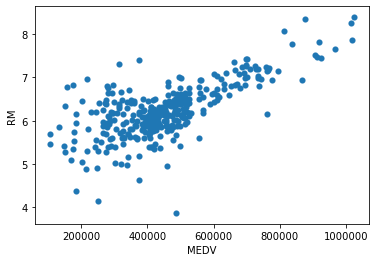

In [13]:
plt.scatter(MEDV_train, RM_train, linewidths=0.1)
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.show()

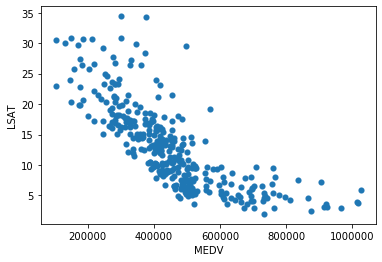

In [14]:
plt.scatter(MEDV_train, LSTAT_train, linewidths=0.1)
plt.xlabel("MEDV")
plt.ylabel("LSAT")
plt.show()

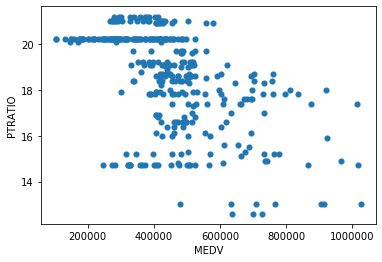

In [15]:
plt.scatter(MEDV_train, PTRATIO_train, linewidths=0.1)
plt.xlabel("MEDV")
plt.ylabel("PTRATIO")
plt.show()

### 標準化

In [16]:
from sklearn import preprocessing # 標準化數據庫

In [17]:
RM_train = preprocessing.minmax_scale(RM_train, feature_range = (-1,1))
RM_tests = preprocessing.minmax_scale(RM_tests, feature_range = (-1,1))

LSTAT_train = preprocessing.minmax_scale(LSTAT_train, feature_range = (-1,1))
PTRATIO_train = preprocessing.minmax_scale(PTRATIO_train, feature_range = (-1,1))

#MEDV_train = preprocessing.minmax_scale(MEDV_train, feature_range = (-1,1))
#MEDV_tests = preprocessing.minmax_scale(MEDV_tests, feature_range = (-1,1))

### 線性回歸

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

Linear_model = LinearRegression()

In [19]:
from sklearn import metrics

Linear_model.fit(MEDV_train, RM_train)    # 使用 train 的數據做回歸
#Linear_model.fit(MEDV_tests, RM_tests)    # 使用 tests 的數據做回歸

predict_train = Linear_model.predict(MEDV_train) # 得到 train 的預測值
#predict_tests = Linear_model.predict(MEDV_tests) # 得到 tests 的預測值

#print('train RMSE :', np.sqrt(metrics.mean_squared_error(MEDV_train, predict_train))) # 使用RMSE查看錯誤率
#print('tests RMSE:', np.sqrt(metrics.mean_squared_error(MEDV_tests, predict_tests)))

c:\users\kaineng\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


train RMSE : 479595.8179073195


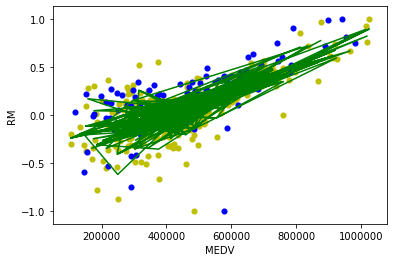

In [27]:
from sklearn.svm import SVR
#model = SVR()

#model.fit(MEDV_train, RM_train)
#linear_svr_predict = model.predict(MEDV_train)

from sklearn import ensemble
rf =ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
rf.fit(MEDV_train, RM_train)    # 使用 train 的數據做回歸
rf_predict = rf.predict(MEDV_train)

from sklearn import metrics

print('train RMSE :', np.sqrt(metrics.mean_squared_error(MEDV_train, linear_svr_predict))) # 使用RMSE查看錯誤率
#print('tests RMSE :', np.sqrt(metrics.mean_squared_error(MEDV_tests, predict_tests)))

plt.plot(MEDV_train, rf_predict, c="g")
#plt.plot(MEDV_tests, predict_tests, c="r")
#plt.text(0.75, 0.25, '-- train', c="g")
#plt.text(0.75, 0.35, '-- predict', c="r")
plt.scatter(MEDV_train, RM_train, linewidths=0.1 ,c="y")   # 測試集的分布
plt.scatter(MEDV_tests, RM_tests, linewidths=0.1 ,c="b")   # 測試集的分布
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.show()

train RMSE : 0.4036821469235603
tests RMSE: 0.2560655384095412


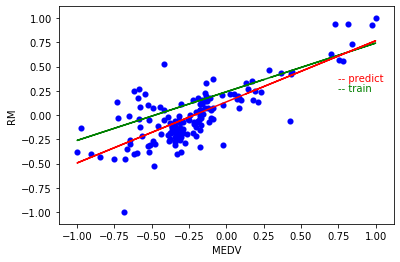

In [94]:
from sklearn import metrics

#Linear_model.fit(MEDV_train, RM_train)    # 使用 train 的數據做回歸
Linear_model.fit(MEDV_tests, RM_tests)    # 使用 tests 的數據做回歸

#predict_train = Linear_model.predict(MEDV_train) # 得到 train 的預測值
predict_tests = Linear_model.predict(MEDV_tests) # 得到 tests 的預測值

print('train RMSE :', np.sqrt(metrics.mean_squared_error(MEDV_train, predict_train))) # 使用RMSE查看錯誤率
print('tests RMSE:', np.sqrt(metrics.mean_squared_error(MEDV_tests, predict_tests)))

plt.plot(MEDV_train, predict_train, c="g")
plt.plot(MEDV_tests, predict_tests, c="r")
plt.text(0.75, 0.25, '-- train', c="g")
plt.text(0.75, 0.35, '-- predict', c="r")
plt.scatter(MEDV_tests, RM_tests, linewidths=0.1 ,c="b")   # 測試集的分布
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.show()

train RMSE : 0.2626687050464331


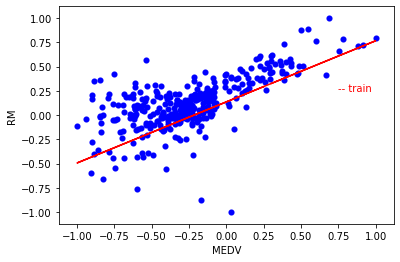

In [95]:
from sklearn import metrics

# Linear_model.fit(MEDV_train, RM_train)    # 使用 train 的數據做回歸

predict_train = Linear_model.predict(MEDV_train) # 得到 train 的預測值

print('train RMSE :', np.sqrt(metrics.mean_squared_error(MEDV_train, predict_train))) # 使用RMSE查看錯誤率

plt.plot(MEDV_train, predict_train, c="r")
plt.text(0.75, 0.25, '-- train', c="r")
plt.scatter(MEDV_train, RM_train, linewidths=0.1 ,c="b")   # 測試集的分布
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.show()

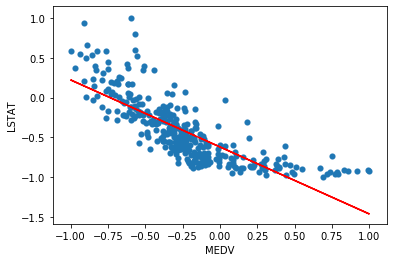

In [28]:
Linear_model.fit(MEDV_train, LSTAT_train)
predict = Linear_model.predict(MEDV_train[:len(MEDV_train),:])

plt.plot(MEDV_train,predict,c="red")
plt.scatter(MEDV_train, LSTAT_train, linewidths=0.1)
plt.xlabel("MEDV")
plt.ylabel("LSTAT")
plt.show()

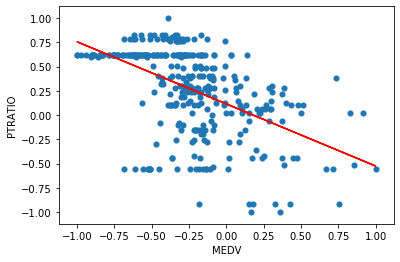

In [21]:
Linear_model.fit(MEDV_train, PTRATIO_train)
predict = Linear_model.predict(MEDV_train[:len(MEDV_train),:])

plt.plot(MEDV_train,predict,c="red")
plt.scatter(MEDV_train, PTRATIO_train, linewidths=0.1)
plt.xlabel("MEDV")
plt.ylabel("PTRATIO")
plt.show()